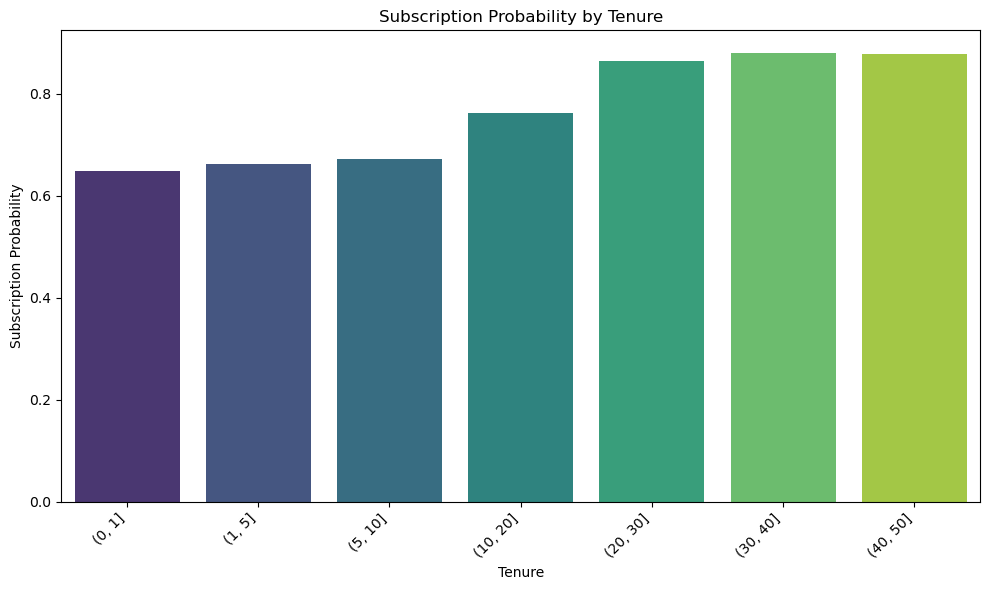

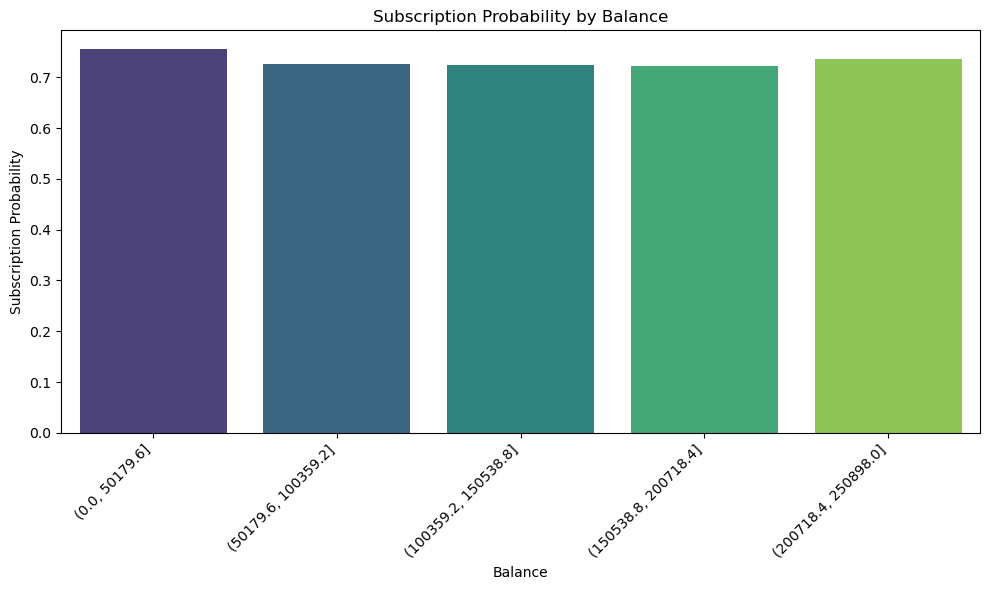

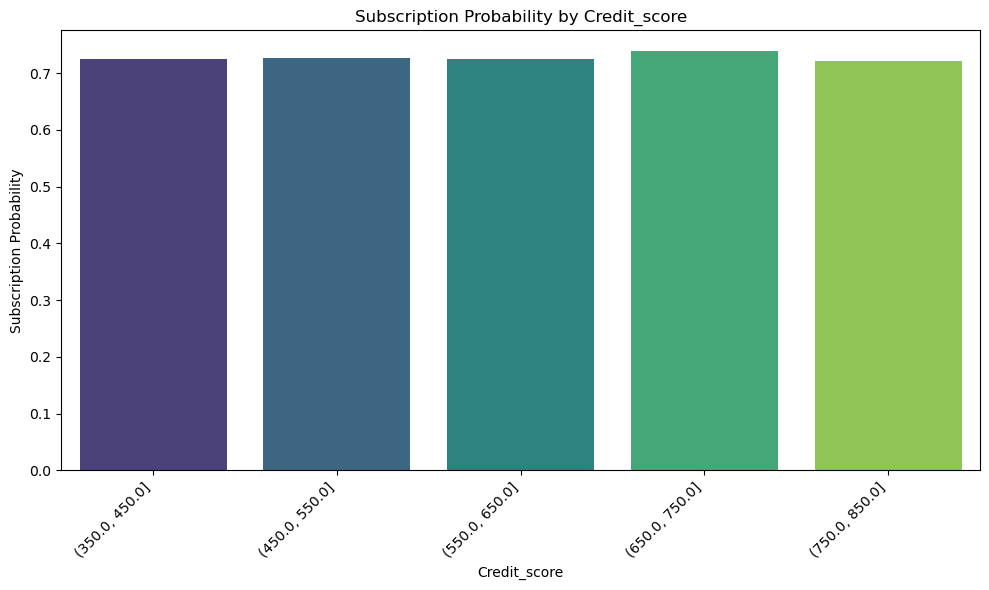

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:\Documents\Project 1, Bank analysis\marketing_campaign_full.csv'
data = pd.read_csv(file_path)


# Ensuring the 'subscribed' column is binary
data['subscribed'] = data['subscribed'].apply(lambda x: 1 if x else 0)

# Define a function to calculate probabilities for a given column
def calculate_probabilities(df, column, bins):
    df[f'{column}_bins'] = pd.cut(df[column], bins=bins)
    grouped = df.groupby(f'{column}_bins')['subscribed'].mean().reset_index()
    grouped.rename(columns={'subscribed': 'subscription_probability'}, inplace=True)
    return grouped

# Defining bins Calculating probabilities for each segment
tenure_bins = [0, 1, 5, 10, 20, 30, 40, 50]
balance_bins = np.linspace(data['balance'].min(), data['balance'].max(), 6)
credit_score_bins = np.linspace(data['credit_score'].min(), data['credit_score'].max(), 6) 


tenure_probs = calculate_probabilities(data, 'tenure', tenure_bins)
balance_probs = calculate_probabilities(data, 'balance', balance_bins)
credit_score_probs = calculate_probabilities(data, 'credit_score', credit_score_bins)


def plot_probabilities(probs, column_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=f'{column_name}_bins', y='subscription_probability', data=probs, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Subscription Probability by {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Subscription Probability')
    plt.tight_layout()
    plt.show()

# Plot probabilities for tenure, balance, and credit score
plot_probabilities(tenure_probs, 'tenure')
plot_probabilities(balance_probs, 'balance')
plot_probabilities(credit_score_probs, 'credit_score')